<a href="https://colab.research.google.com/github/Swatijoshi2002/scikitlearn_machinelearning/blob/main/housepricepredictionxgboostfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install -U scikit-learn

In [4]:
import numpy as np #used for making arrays
import pandas as pd #used for making dataframe 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors,metrics

In [1]:
from google.colab import files
uploaded=files.upload()

Saving MagicBricks.csv to MagicBricks.csv


In [104]:
import io
data=pd.read_csv(io.BytesIO(uploaded['MagicBricks.csv']))
new_data=data
furnish=pd.get_dummies(new_data["Furnishing"])
furnish

transaction=pd.get_dummies(new_data['Transaction'])
transaction

Typ=pd.get_dummies(new_data["Type"])
Typ

status=pd.get_dummies(new_data['Status'])
status

,Almost_ready,Ready_to_move
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1254,0,1
1255,0,1
1256,0,1
1257,0,1


In [105]:
new_data.drop(['Transaction','Furnishing','Type','Status'],axis='columns',inplace=True)
print(new_data.head(2))

    Area  BHK  Bathroom  ... Parking    Price  Per_Sqft
0  800.0    3       2.0  ...     1.0  6500000       NaN
1  750.0    2       2.0  ...     1.0  5000000    6667.0

[2 rows x 7 columns]


In [106]:
new_data['Furnished']=furnish['Furnished'].to_list()
new_data['Semi-Furnished']=furnish['Semi-Furnished'].to_list()
new_data['Unfurnished']=furnish['Unfurnished'].to_list()

new_data['New_Property']=transaction['New_Property'].to_list()
new_data['Resale']=transaction['Resale'].to_list()

new_data['Builder_Floor']=Typ['Builder_Floor'].to_list()
new_data['Apartment']=Typ['Apartment'].to_list()

new_data['Ready_to_move']=status['Ready_to_move'].to_list()
new_data['Almost_ready']=status['Almost_ready'].to_list()

In [107]:
print(new_data.head)
print(new_data.shape)

<bound method NDFrame.head of          Area  BHK  Bathroom  ... Apartment  Ready_to_move  Almost_ready
0       800.0    3       2.0  ...         0              1             0
1       750.0    2       2.0  ...         1              1             0
2       950.0    2       2.0  ...         1              1             0
3       600.0    2       2.0  ...         0              1             0
4       650.0    2       2.0  ...         0              1             0
...       ...  ...       ...  ...       ...            ...           ...
1254   4118.0    4       5.0  ...         0              1             0
1255   1050.0    3       2.0  ...         0              1             0
1256    875.0    3       3.0  ...         0              1             0
1257    990.0    2       2.0  ...         0              1             0
1258  11050.0    3       3.0  ...         0              1             0

[1259 rows x 16 columns]>
(1259, 16)


In [108]:
new_data.describe()


,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnished,Semi-Furnished,Unfurnished,New_Property,Resale,Builder_Floor,Apartment,Ready_to_move,Almost_ready
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542,0.145353,0.562351,0.288324,0.379666,0.620334,0.525020,0.471009,0.940429,0.059571
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568,0.352597,0.496294,0.453163,0.485497,0.485497,0.499572,0.499357,0.236785,0.236785
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
correlation=new_data.corr()


constructing heatmap for correlation

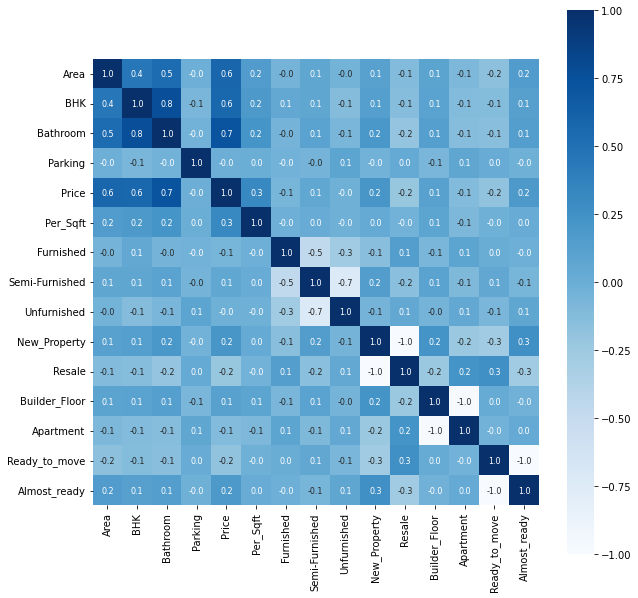

In [110]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [114]:
X=new_data.drop(['Price','Locality'],axis=1) 
Y=new_data['Price']

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2) #training datais 80%  and test data=20%
print(X.shape,X_train.shape,X_test.shape)
 

(1259, 14) (1007, 14) (252, 14)


In [116]:
#loading model
model=XGBRegressor()
model.fit(X_train,Y_train)

[10:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [118]:
prediction=model.predict(X_train)
print(prediction)

[50349304.   4099454.   1349199.6 ... 23816342.  24147798.  28016636. ]


In [124]:

#r square error
error1=metrics.r2_score(Y_train,prediction)
print("r2 error==>",error1) #gives the error made by our model

r2 error==> 0.9378421217327599


Text(0.5, 1.0, 'actual and predicted price graph')

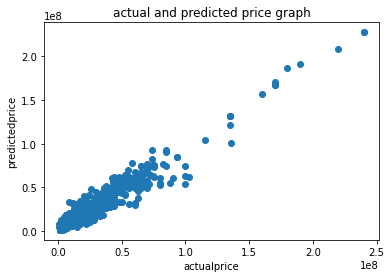

In [120]:
plt.scatter(Y_train,prediction)
plt.xlabel('actualprice')
plt.ylabel('predictedprice')
plt.title('actual and predicted price graph')

In [126]:
prediction_t=model.predict(X_test)
print(prediction_t)
errort=metrics.r2_score(Y_test,prediction_t)
print("r2 error==>",errort) #gives the error made by our model


[4.2753255e+06 6.1835020e+06 2.0476390e+07 5.3014940e+06 1.4130484e+07
 1.1535346e+07 2.7737252e+07 1.8139975e+06 3.3342000e+06 9.8440060e+06
 3.6666748e+07 1.5658664e+07 7.6881475e+06 1.7758618e+07 1.1252864e+07
 7.9017085e+06 1.3814352e+07 6.5546184e+07 6.3532612e+07 6.0514245e+06
 3.7888345e+06 1.7379318e+07 5.8135165e+06 1.7510078e+07 4.0008388e+06
 3.1683934e+07 1.1840568e+07 1.1346754e+07 2.3846402e+07 7.4311120e+06
 4.8562635e+06 1.8881928e+06 4.2093410e+06 1.7528740e+06 6.4252230e+06
 3.5674625e+06 9.2659360e+06 2.6672232e+06 1.2280840e+07 4.6754156e+07
 1.9493164e+06 2.2324100e+07 1.6009018e+07 7.3860445e+06 5.8302695e+06
 1.2909787e+08 2.9000922e+07 1.1535088e+07 1.6166566e+07 2.0476390e+07
 1.0626842e+07 2.5159848e+07 1.3177312e+07 1.6123164e+07 5.9785205e+06
 1.3456374e+07 2.9432772e+07 5.7109820e+07 3.4786280e+07 1.9226384e+07
 1.9231698e+07 1.6192622e+07 1.7528740e+06 1.7510078e+07 1.7761454e+07
 1.0126230e+07 4.8540024e+07 4.4222245e+06 1.0383450e+07 1.3089561e+08
 4.595

Text(0.5, 1.0, 'actual and predicted price graph')

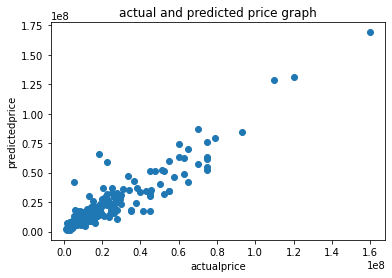

In [122]:
plt.scatter(Y_test,prediction_t)
plt.xlabel('actualprice')
plt.ylabel('predictedprice')
plt.title('actual and predicted price graph')